In [1]:
#!pip install -U spacy

In [2]:
#!python -m spacy download en_core_web_lg

# Extractive Text Summarization - Manual Approach
Text summarization refers to the technique of shortening long pieces of text. The intention is to create a coherent and fluent summary having only the main points outlined in the document. Automatic text summarization is a common problem in machine learning and natural language processing (NLP).

.Input data

.Word Tokenization

.Stopwrod removal

.Identify weight of each word

.identify sentence weight on the basis of word weights

In [1]:
#import libraries
import pandas as pd
import numpy as np
import string
import nltk
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

# IMPORT DATASET

In [2]:
book= pd.read_csv('C:/Users/DELL/Downloads/time_management.txt',error_bad_lines=False)
book

C:\Users\DELL\AppData\Local\Temp\ipykernel_19828\1245954260.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book= pd.read_csv('C:/Users/DELL/Downloads/time_management.txt',error_bad_lines=False)
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 11: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 2\nSkipping line 15: expected 1 fields, saw 2\nSkipping line 16: expected 1 fields, saw 3\nSkipping line 22: expected 1 fields, saw 3\nSkipping line 24: expected 1 fields, saw 3\nSkipping line 29: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 4\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 3\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 56: expected 1 fields, saw 3\n

,THE BRIAN TRACY SUCCESS LIBRARY
0,BRIAN TRACY
1,TIME MANAGEMENT
2,Introduction
3,success or failure. Time is the one indispensa...
4,placeable resource of accomplishment. It is yo...
...,...
1841,Assoclation®
1842,Pee cel mere
1843,RCO]
1844,American Management Association / www.amanet.org


In [3]:
book

,THE BRIAN TRACY SUCCESS LIBRARY
0,BRIAN TRACY
1,TIME MANAGEMENT
2,Introduction
3,success or failure. Time is the one indispensa...
4,placeable resource of accomplishment. It is yo...
...,...
1841,Assoclation®
1842,Pee cel mere
1843,RCO]
1844,American Management Association / www.amanet.org


In [4]:
book.columns=['x']

In [5]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book

['BRIAN TRACY',
 'TIME MANAGEMENT',
 'Introduction',
 'success or failure. Time is the one indispensable and irre-',
 'placeable resource of accomplishment. It is your most pre-',
 'greater will be your rewards.',
 'Time management is essential for maximum health and',
 'personal effectiveness. The degree to which you feel in con-',
 'trol of your time and your life is a major determinant of your',
 'ing of being “out of control” of your time is the major source',
 'American Management Association / www.amanet.org',
 '2 TIME MANAGEMENT',
 'It is possible for you to gain two productive hours each',
 'These techniques have proven successful for many thou-',
 'the four Ds.',
 'The Four Ds of Effectiveness',
 'desire to get your time under control and to achieve maxi-',
 'mum effectiveness.',
 'The second D is decisiveness: You must make a clear deci-',
 'sion that you are going to practice good time management',
 'techniques until they become a habit.',
 'The third D stands for determinat

In [6]:
# Joining the list into one string/text
text = ' '.join(book)
len(text)

102758

In [7]:
text

"BRIAN TRACY TIME MANAGEMENT Introduction success or failure. Time is the one indispensable and irre- placeable resource of accomplishment. It is your most pre- greater will be your rewards. Time management is essential for maximum health and personal effectiveness. The degree to which you feel in con- trol of your time and your life is a major determinant of your ing of being “out of control” of your time is the major source American Management Association / www.amanet.org 2 TIME MANAGEMENT It is possible for you to gain two productive hours each These techniques have proven successful for many thou- the four Ds. The Four Ds of Effectiveness desire to get your time under control and to achieve maxi- mum effectiveness. The second D is decisiveness: You must make a clear deci- sion that you are going to practice good time management techniques until they become a habit. The third D stands for determination: You must be willing to persist in the face of all temptations to the contrary un

# PUNCTUATIONS AND STOPWORDS

In [8]:
punctuation=punctuation+'\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [9]:
clean_text=re.sub('[^a-zA-Z]',' ',text)
clean_text=re.sub('\s+',' ',clean_text)
clean_text

'BRIAN TRACY TIME MANAGEMENT Introduction success or failure Time is the one indispensable and irre placeable resource of accomplishment It is your most pre greater will be your rewards Time management is essential for maximum health and personal effectiveness The degree to which you feel in con trol of your time and your life is a major determinant of your ing of being out of control of your time is the major source American Management Association www amanet org TIME MANAGEMENT It is possible for you to gain two productive hours each These techniques have proven successful for many thou the four Ds The Four Ds of Effectiveness desire to get your time under control and to achieve maxi mum effectiveness The second D is decisiveness You must make a clear deci sion that you are going to practice good time management techniques until they become a habit The third D stands for determination You must be willing to persist in the face of all temptations to the contrary until you have become a

In [10]:
no_punc_text=clean_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'BRIAN TRACY TIME MANAGEMENT Introduction success or failure Time is the one indispensable and irre placeable resource of accomplishment It is your most pre greater will be your rewards Time management is essential for maximum health and personal effectiveness The degree to which you feel in con trol of your time and your life is a major determinant of your ing of being out of control of your time is the major source American Management Association www amanet org TIME MANAGEMENT It is possible for you to gain two productive hours each These techniques have proven successful for many thou the four Ds The Four Ds of Effectiveness desire to get your time under control and to achieve maxi mum effectiveness The second D is decisiveness You must make a clear deci sion that you are going to practice good time management techniques until they become a habit The third D stands for determination You must be willing to persist in the face of all temptations to the contrary until you have become a

In [11]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['BRIAN', 'TRACY', 'TIME', 'MANAGEMENT', 'Introduction', 'success', 'or', 'failure', 'Time', 'is', 'the', 'one', 'indispensable', 'and', 'irre', 'placeable', 'resource', 'of', 'accomplishment', 'It', 'is', 'your', 'most', 'pre', 'greater', 'will', 'be', 'your', 'rewards', 'Time', 'management', 'is', 'essential', 'for', 'maximum', 'health', 'and', 'personal', 'effectiveness', 'The', 'degree', 'to', 'which', 'you', 'feel', 'in', 'con', 'trol', 'of', 'your', 'time', 'and', 'your', 'life', 'is', 'a', 'major', 'determinant', 'of', 'your', 'ing', 'of', 'being', 'out', 'of', 'control', 'of', 'your', 'time', 'is', 'the', 'major', 'source', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'TIME', 'MANAGEMENT', 'It', 'is', 'possible', 'for', 'you', 'to', 'gain', 'two', 'productive', 'hours', 'each', 'These', 'techniques', 'have', 'proven', 'successful', 'for', 'many', 'thou', 'the', 'four', 'Ds', 'The', 'Four', 'Ds', 'of', 'Effectiveness', 'desire', 'to', 'get', 'your', 'time', '

In [12]:
stopwords=list(STOP_WORDS)
stopwords

['behind',
 'did',
 'never',
 'an',
 'either',
 'two',
 'more',
 'your',
 'yet',
 'everywhere',
 'here',
 'thereupon',
 'sixty',
 'our',
 'beforehand',
 '‘ll',
 'so',
 'therefore',
 'from',
 'enough',
 'been',
 "'m",
 'see',
 'against',
 'noone',
 'take',
 'ca',
 'keep',
 "n't",
 'forty',
 'of',
 'since',
 'you',
 'anyone',
 'wherever',
 'still',
 'they',
 'myself',
 'moreover',
 'one',
 'amongst',
 'please',
 'very',
 'anyway',
 'who',
 'between',
 '’d',
 'such',
 'this',
 'get',
 'beside',
 'and',
 'towards',
 'does',
 'thus',
 'be',
 'just',
 'ever',
 'my',
 'too',
 'at',
 'n’t',
 'much',
 'might',
 'former',
 'what',
 'how',
 'while',
 'full',
 'us',
 "'ll",
 'are',
 'besides',
 'put',
 'when',
 'on',
 'ours',
 'less',
 'into',
 'empty',
 'few',
 'i',
 'yours',
 'made',
 'beyond',
 'up',
 'or',
 '‘s',
 'toward',
 'meanwhile',
 'nevertheless',
 'least',
 "'ve",
 'down',
 'we',
 'to',
 '‘d',
 'not',
 'hundred',
 'is',
 'none',
 'whenever',
 'whereby',
 'because',
 'via',
 'whereupon'

In [13]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['ye','yeah','haha','Yes','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['BRIAN', 'TRACY', 'TIME', 'MANAGEMENT', 'Introduction', 'success', 'failure', 'Time', 'one', 'indispensable', 'irre', 'placeable', 'resource', 'accomplishment', 'It', 'pre', 'greater', 'rewards', 'Time', 'management', 'essential', 'maximum', 'health', 'personal', 'effectiveness', 'The', 'degree', 'feel', 'con', 'trol', 'time', 'life', 'major', 'determinant', 'ing', 'control', 'time', 'major', 'source', 'American', 'Management', 'Association', 'www', 'amanet', 'org', 'TIME', 'MANAGEMENT', 'It', 'possible', 'gain', 'two', 'productive', 'hours', 'These', 'techniques', 'proven', 'successful', 'many', 'thou', 'four', 'Ds', 'The', 'Four', 'Ds', 'Effectiveness', 'desire', 'get', 'time', 'control', 'achieve', 'maxi', 'mum', 'effectiveness', 'The', 'second', 'D', 'decisiveness', 'You', 'must', 'make', 'clear', 'deci', 'sion', 'going', 'practice', 'good', 'time', 'management', 'techniques', 'become', 'habit', 'The', 'third', 'D', 'stands', 'determination', 'You', 'must', 'willing', 'persist', '

# NORMALIZE DATA

In [14]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words)

['brian', 'tracy', 'time', 'management', 'introduction', 'success', 'failure', 'time', 'one', 'indispensable', 'irre', 'placeable', 'resource', 'accomplishment', 'it', 'pre', 'greater', 'rewards', 'time', 'management', 'essential', 'maximum', 'health', 'personal', 'effectiveness', 'the', 'degree', 'feel', 'con', 'trol', 'time', 'life', 'major', 'determinant', 'ing', 'control', 'time', 'major', 'source', 'american', 'management', 'association', 'www', 'amanet', 'org', 'time', 'management', 'it', 'possible', 'gain', 'two', 'productive', 'hours', 'these', 'techniques', 'proven', 'successful', 'many', 'thou', 'four', 'ds', 'the', 'four', 'ds', 'effectiveness', 'desire', 'get', 'time', 'control', 'achieve', 'maxi', 'mum', 'effectiveness', 'the', 'second', 'd', 'decisiveness', 'you', 'must', 'make', 'clear', 'deci', 'sion', 'going', 'practice', 'good', 'time', 'management', 'techniques', 'become', 'habit', 'the', 'third', 'd', 'stands', 'determination', 'you', 'must', 'willing', 'persist', '

In [15]:
len(lower_words)

10060

# STEMMING AND LAMMATIZATION

In [16]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['brian', 'traci', 'time', 'manag', 'introduct', 'success', 'failur', 'time', 'one', 'indispens', 'irr', 'placeabl', 'resourc', 'accomplish', 'it', 'pre', 'greater', 'reward', 'time', 'manag', 'essenti', 'maximum', 'health', 'person', 'effect', 'the', 'degre', 'feel', 'con', 'trol', 'time', 'life', 'major', 'determin', 'ing', 'control', 'time', 'major', 'sourc', 'american', 'manag', 'associ', 'www', 'amanet', 'org', 'time', 'manag', 'it', 'possibl', 'gain', 'two', 'product', 'hour', 'these', 'techniqu', 'proven', 'success', 'mani', 'thou', 'four', 'ds', 'the', 'four', 'ds', 'effect', 'desir', 'get', 'time', 'control', 'achiev', 'maxi', 'mum', 'effect', 'the', 'second', 'd', 'decis', 'you', 'must', 'make', 'clear', 'deci', 'sion', 'go', 'practic', 'good', 'time', 'manag', 'techniqu', 'becom', 'habit', 'the', 'third', 'd', 'stand', 'determin', 'you', 'must', 'will', 'persist', 'face', 'temptat', 'contrari', 'becom', 'effect', 'time', 'manag', 'your', 'desir', 'reinforc', 'determin', 'tim

In [17]:
len(stemmed_tokens)

10060

In [18]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

brian tracy time management introduction success failure time one indispensable irre placeable resource accomplishment it pre greater rewards time management essential maximum health personal effectiveness the degree feel con trol time life major determinant ing control time major source american management association www amanet org time management it possible gain two productive hours these techniques proven successful many thou four ds the four ds effectiveness desire get time control achieve maxi mum effectiveness the second d decisiveness you must make clear deci sion going practice good time management techniques become habit the third d stands determination you must willing persist face temptations contrary become effective time manager your desire reinforce determination time management lifelong practice effective discipline whether feel like this critical success american management association www amanet org introduction the payoff becoming excellent time manager huge it outw

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['brian', 'tracy', 'time', 'management', 'introduction', 'success', 'failure', 'time', 'one', 'indispensable', 'irre', 'placeable', 'resource', 'accomplishment', 'it', 'pre', 'great', 'reward', 'time', 'management', 'essential', 'maximum', 'health', 'personal', 'effectiveness', 'the', 'degree', 'feel', 'con', 'trol', 'time', 'life', 'major', 'determinant', 'ing', 'control', 'time', 'major', 'source', 'american', 'management', 'association', 'www', 'amanet', 'org', 'time', 'management', 'it', 'possible', 'gain', 'two', 'productive', 'hour', 'these', 'technique', 'prove', 'successful', 'many', 'thou', 'four', 'ds', 'the', 'four', 'ds', 'effectiveness', 'desire', 'get', 'time', 'control', 'achieve', 'maxi', 'mum', 'effectiveness', 'the', 'second', 'd', 'decisiveness', 'you', 'must', 'make', 'clear', 'deci', 'sion', 'go', 'practice', 'good', 'time', 'management', 'technique', 'become', 'habit', 'the', 'third', 'd', 'stand', 'determination', 'you', 'must', 'will', 'persist', 'face', 'tempta

In [20]:
final=' '.join(lemmas)
final

'brian tracy time management introduction success failure time one indispensable irre placeable resource accomplishment it pre great reward time management essential maximum health personal effectiveness the degree feel con trol time life major determinant ing control time major source american management association www amanet org time management it possible gain two productive hour these technique prove successful many thou four ds the four ds effectiveness desire get time control achieve maxi mum effectiveness the second d decisiveness you must make clear deci sion go practice good time management technique become habit the third d stand determination you must will persist face temptation contrary become effective time manager your desire reinforce determination time management lifelong practice effective discipline whether feel like this critical success american management association www amanet org introduction the payoff become excellent time manager huge it outwardly identifiab

# FEATURE EXTRACTION

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<10066x2034 sparse matrix of type '<class 'numpy.int64'>'
	with 10001 stored elements in Compressed Sparse Row format>

In [22]:
print(vectorizer.get_feature_names()[40:90])

['advance', 'advanced', 'advantage', 'advertisement', 'affect', 'affirm', 'after', 'afternoon', 'agement', 'agency', 'agenda', 'agent', 'aggravate', 'aggressive', 'agree', 'ahead', 'aim', 'alan', 'alcohol', 'alert', 'alignment', 'all', 'alliance', 'allow', 'ally', 'almost', 'along', 'already', 'also', 'alter', 'alto', 'always', 'ama', 'amacom', 'amacombook', 'amanet', 'amazed', 'amazing', 'american', 'among', 'amount', 'an', 'analysis', 'analyze', 'and', 'angeles', 'angry', 'another', 'answer', 'anxiety']


C:\PYTHON\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# WORD FREQUENCIES AND SENTENCE SCORE

In [23]:
word_frequencies={}

for word in nltk.word_tokenize(final):
    if word not in STOP_WORDS:
        if word not in word_frequencies:
            word_frequencies[word]=1
        else:
            word_frequencies[word]+=1

In [24]:
max_frequency = max(word_frequencies.values())
max_frequency

251

In [25]:
for word in word_frequencies:
    word_frequencies[word]=word_frequencies[word]/max_frequency
print (word + " ")
print(word_frequencies[word])

rco 
0.00398406374501992


In [26]:
sentence_tokens = [sent for sent in doc.sents]
print(sentence_tokens)

[brian tracy time management introduction success failure time one indispensable irre placeable resource accomplishment it pre greater rewards time management essential maximum health personal effectiveness the degree feel con trol time life major determinant ing control time major source american management association www amanet org time management it possible gain two productive hours these techniques proven successful many thou, four ds the four ds effectiveness desire get time control achieve maxi mum effectiveness the second d decisiveness you must make clear deci sion going practice good time management techniques become habit the third d stands determination you must willing persist face temptations contrary become effective time manager your desire reinforce determination time management lifelong practice effective discipline whether feel like this critical success american management association www amanet org introduction the payoff becoming excellent time manager huge it ou

In [27]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

In [28]:
sentence_scores

{brian tracy time management introduction success failure time one indispensable irre placeable resource accomplishment it pre greater rewards time management essential maximum health personal effectiveness the degree feel con trol time life major determinant ing control time major source american management association www amanet org time management it possible gain two productive hours these techniques proven successful many thou: 13.601593625498007,
 four ds the four ds effectiveness desire get time control achieve maxi mum effectiveness the second d decisiveness you must make clear deci sion going practice good time management techniques become habit the third d stands determination you must willing persist face temptations contrary become effective time manager your desire reinforce determination time management lifelong practice effective discipline whether feel like this critical success american management association www amanet org introduction the payoff becoming excellent ti

In [29]:
from heapq import nlargest

In [30]:
select_length = int(len(sentence_tokens)*0.3)

In [31]:
select_length

9

In [32]:
summary = nlargest(select_length, sentence_scores, key=sentence_scores.get)
summary

[many top executives make better decisions present successful business adult life with clear extra hours get excellent grades high school harder courses studies much longer peers graduate close possible top class american management association www amanet org opportunity get paid pro moted faster classmates really thinking future when clear want decisions present the rule long term vision improves short term decision making you heard get the habit developing long time perspective quite powerful by projecting future looking back mistakes could avoid this exercise help crystallize values it give internal tools organize time activities today moving toward creation ideal future ready time management techniques want get faster if moving managing time way accelerates speed accomplishment time management strategies tactics applied without clear future vision get desti american management association www amanet org time management management techniques available american management association

In [33]:
Final_summary = [word.text for word in summary]
summary=' '.join(Final_summary)

In [34]:
print(summary)

many top executives make better decisions present successful business adult life with clear extra hours get excellent grades high school harder courses studies much longer peers graduate close possible top class american management association www amanet org opportunity get paid pro moted faster classmates really thinking future when clear want decisions present the rule long term vision improves short term decision making you heard get the habit developing long time perspective quite powerful by projecting future looking back mistakes could avoid this exercise help crystallize values it give internal tools organize time activities today moving toward creation ideal future ready time management techniques want get faster if moving managing time way accelerates speed accomplishment time management strategies tactics applied without clear future vision get desti american management association www amanet org time management management techniques available american management association 

In [35]:
len(text)

102758

In [36]:
len(summary)

51218

# Infrence: As you can see above the lenght of text is 102758 during the Manual Approach its reduce to 51218 it is still has a big lenght now we going to do model based approach.

# MANUAL MODEL ACCURACY

In [37]:
Model_Accuracy=len(summary)/len(text)*100
Model_Accuracy

49.843321201269006

# WORDCLOUD

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

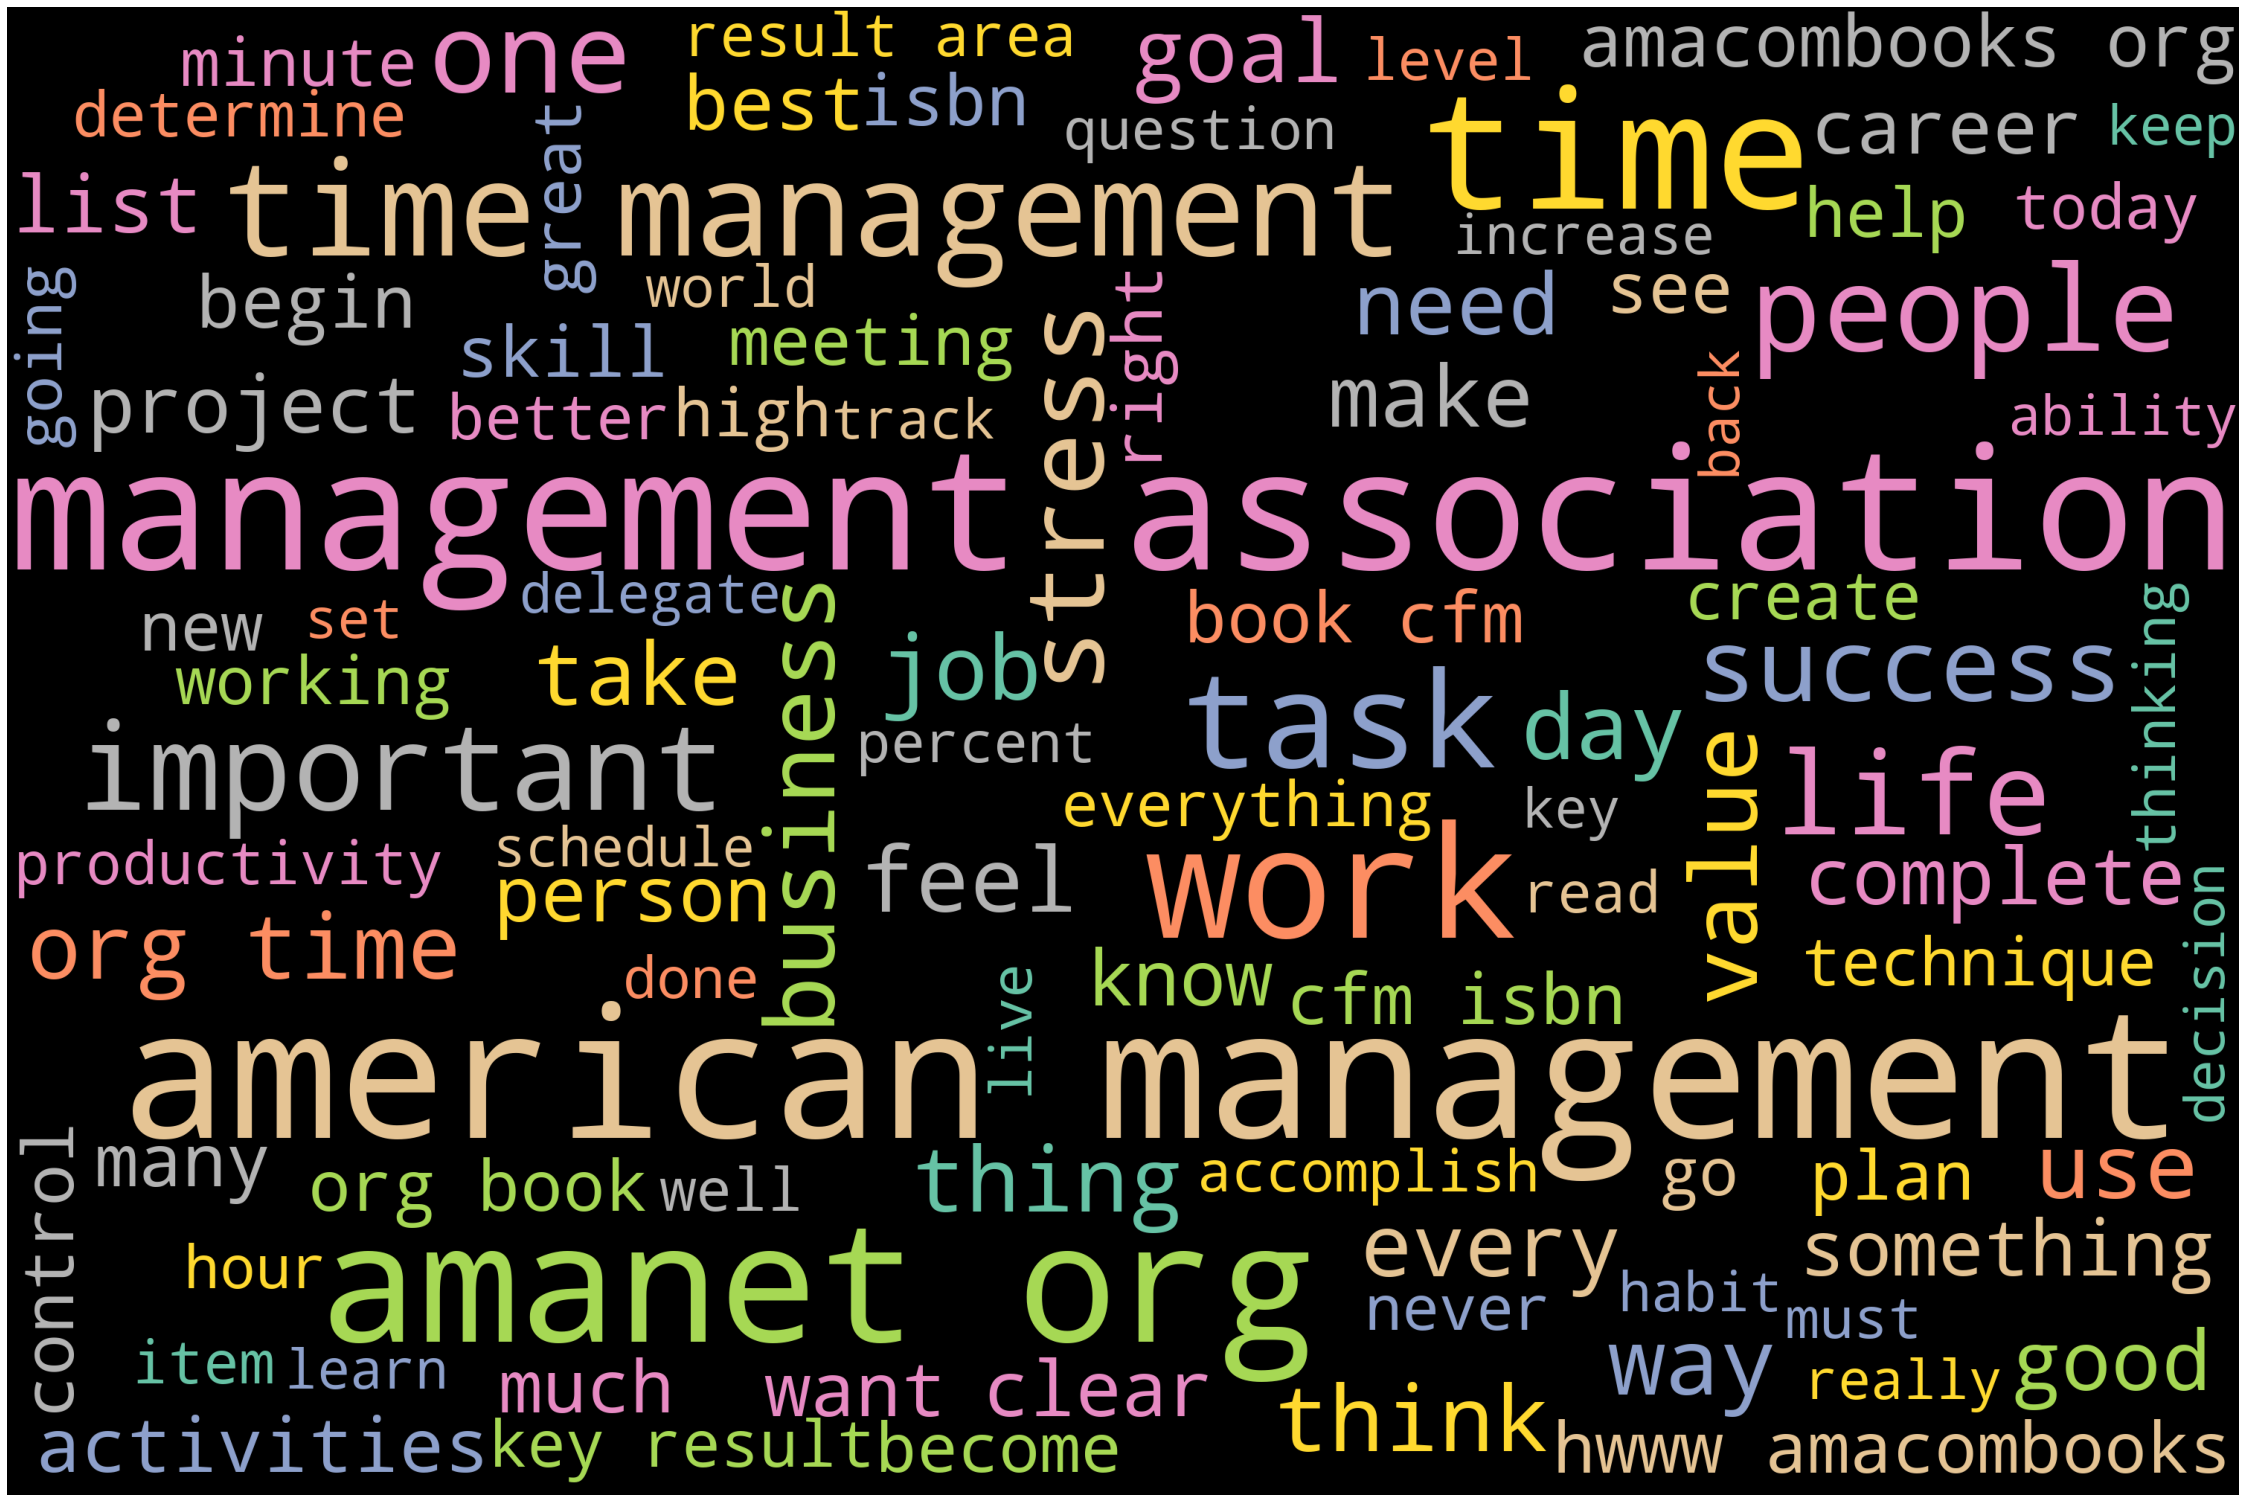

In [39]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(summary)
# Plot
plot_cloud(wordcloud)

# MODEL 1 PEGASUS SUMMARIZER

In [47]:
import torch

In [42]:
from transformers import AutoTokenizer

In [43]:
model_name = 'google/pegasus-xsum'

In [44]:
tokenizer =AutoTokenizer.from_pretrained("google/pegasus-xsum")

In [45]:
from transformers import PegasusForConditionalGeneration,PegasusTokenizer

In [48]:
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [54]:
model=PegasusForConditionalGeneration.from_pretrained(model_name).to (torch_device)

In [49]:
tokenized_text=tokenizer(text, truncation=True)

In [174]:
print(tokenized_text[0].tokens)

['▁B', 'RIAN', '▁TRA', 'CY', '▁TIME', '▁MANAGEMENT', '▁Introduction', '▁success', '▁or', '▁failure', '.', '▁Time', '▁is', '▁the', '▁one', '▁indispensable', '▁and', '▁irre', '-', '▁place', 'able', '▁resource', '▁of', '▁accomplishment', '.', '▁It', '▁is', '▁your', '▁most', '▁pre', '-', '▁greater', '▁will', '▁be', '▁your', '▁rewards', '.', '▁Time', '▁management', '▁is', '▁essential', '▁for', '▁maximum', '▁health', '▁and', '▁personal', '▁effectiveness', '.', '▁The', '▁degree', '▁to', '▁which', '▁you', '▁feel', '▁in', '▁con', '-', '▁', 'trol', '▁of', '▁your', '▁time', '▁and', '▁your', '▁life', '▁is', '▁a', '▁major', '▁determinant', '▁of', '▁your', '▁', 'ing', '▁of', '▁being', '▁“', 'out', '▁of', '▁control', '”', '▁of', '▁your', '▁time', '▁is', '▁the', '▁major', '▁source', '▁American', '▁Management', '▁Association', '▁/', '▁www', '.', 'ama', 'net', '.', 'org', '▁2', '▁TIME', '▁MANAGEMENT', '▁It', '▁is', '▁possible', '▁for', '▁you', '▁to', '▁gain', '▁two', '▁productive', '▁hours', '▁each', '▁

In [51]:
print(tokenized_text[0].ids)

[596, 74741, 35743, 33721, 15370, 59782, 12621, 924, 132, 2939, 107, 2247, 117, 109, 156, 20302, 111, 62665, 121, 295, 1431, 2478, 113, 14547, 107, 168, 117, 128, 205, 1133, 121, 1626, 138, 129, 128, 6144, 107, 2247, 603, 117, 1442, 118, 2004, 426, 111, 510, 5800, 107, 139, 1393, 112, 162, 119, 393, 115, 5355, 121, 110, 37158, 113, 128, 166, 111, 128, 271, 117, 114, 698, 57507, 113, 128, 110, 273, 113, 270, 185, 1992, 113, 562, 227, 113, 128, 166, 117, 109, 698, 1116, 655, 1764, 1534, 943, 2042, 107, 16163, 2829, 107, 1793, 280, 15370, 59782, 168, 117, 433, 118, 119, 112, 1830, 228, 5284, 539, 276, 507, 1739, 133, 3288, 1147, 118, 223, 17463, 121, 109, 541, 714, 116, 107, 139, 5107, 714, 116, 113, 55659, 2524, 112, 179, 128, 166, 365, 562, 111, 112, 1433, 30658, 121, 9996, 5800, 107, 139, 453, 714, 117, 19085, 1759, 151, 226, 355, 193, 114, 786, 43818, 121, 110, 17305, 120, 119, 127, 313, 112, 846, 234, 166, 603, 1739, 430, 157, 460, 114, 6492, 107, 139, 776, 714, 3034, 118, 6796, 151,

In [175]:
text_encoding=tokenizer(text, truncation=True, padding='longest',return_tensors='pt').to(torch_device)

In [176]:
generated_ids=model.generate(input_ids=text_encoding['input_ids'],attention_mask=text_encoding['attention_mask'])

In [177]:
text_sum= tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

In [178]:
text_sum

['The payoff for becoming an excellent time manager is huge.. The fourth D']

In [181]:
score1 = sentence_bleu(text,text_sum)
score1

0

In [182]:
Model_Accuracy=len(tgt_text)/len(text)*100
Model_Accuracy

0.0009731602405652115

# MODEL 2 PIPELINE

In [64]:
from transformers import pipeline

In [65]:
sentences=text.split('<eos>')

In [66]:
max_chunk=500
current_chunk=0
chunks=[]

for sentence in sentences:
    if len(chunks)==current_chunk+1:
        if len(chunks[current_chunk])+len(sentence.split(' '))<max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

0


In [67]:
for chunk_id in range (len(chunks)):
    chunks[chunk_id]=' '.join(chunks[chunk_id])

In [68]:
chunks[0]

"BRIAN TRACY TIME MANAGEMENT Introduction success or failure. Time is the one indispensable and irre- placeable resource of accomplishment. It is your most pre- greater will be your rewards. Time management is essential for maximum health and personal effectiveness. The degree to which you feel in con- trol of your time and your life is a major determinant of your ing of being “out of control” of your time is the major source American Management Association / www.amanet.org 2 TIME MANAGEMENT It is possible for you to gain two productive hours each These techniques have proven successful for many thou- the four Ds. The Four Ds of Effectiveness desire to get your time under control and to achieve maxi- mum effectiveness. The second D is decisiveness: You must make a clear deci- sion that you are going to practice good time management techniques until they become a habit. The third D stands for determination: You must be willing to persist in the face of all temptations to the contrary un

In [69]:
len(chunks[0].split(' '))

17024

In [71]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


# We used the pipeline model, but this model did not work on big data, so we tried this model on online blogs.

# SUMMARY ONLINE BLOGS

In [74]:
from transformers import pipeline

In [75]:
summarizer=pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


In [76]:
TEXT="""Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn', that is, methods that leverage data to improve performance on some set of tasks.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.[3]

A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers, but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised learning.[5][6] Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain.[7][8] In its application across business problems, machine learning is also referred to as predictive analytics.

,As a scientific endeavor, machine learning grew out of the quest for artificial intelligence. In the early days of AI as an academic discipline, some researchers were interested in having machines learn from data. They attempted to approach the problem with various symbolic methods, as well as what was then termed "neural networks"; these were mostly perceptrons and other models that were later found to be reinventions of the generalized linear models of statistics.[23] Probabilistic reasoning was also employed, especially in automated medical diagnosis.[24]: 488 

However, an increasing emphasis on the logical, knowledge-based approach caused a rift between AI and machine learning. Probabilistic systems were plagued by theoretical and practical problems of data acquisition and representation.[24]: 488  By 1980, expert systems had come to dominate AI, and statistics was out of favor.[25] Work on symbolic/knowledge-based learning did continue within AI, leading to inductive logic programming, but the more statistical line of research was now outside the field of AI proper, in pattern recognition and information retrieval.[24]: 708–710, 755  Neural networks research had been abandoned by AI and computer science around the same time. This line, too, was continued outside the AI/CS field, as "connectionism", by researchers from other disciplines including Hopfield, Rumelhart and Hinton. Their main success came in the mid-1980s with the reinvention of backpropagation.[24]: 25 

Machine learning (ML), reorganized as a separate field, started to flourish in the 1990s. The field changed its goal from achieving artificial intelligence to tackling solvable problems of a practical nature. It shifted focus away from the symbolic approaches it had inherited from AI, and toward methods and models borrowed from statistics, fuzzy logic, and probability theory.[25]

The difference between ML and AI is frequently misunderstood. ML learns and predicts based on passive observations, whereas AI implies an agent interacting with the environment to learn and take actions that maximize its chance of successfully achieving its goals.[26]

As of 2020, many sources continue to assert that ML remains a subfield of AI.[27][28][25] Others have the view that not all ML is part of AI, but only an 'intelligent subset' of ML should be considered AI.[4][29][30]"""

In [130]:
summary_bl=summarizer(TEXT, max_length=130, min_length=30,do_sample=False)

In [131]:
summary_bl

[{'summary_text': " Machine learning (ML) is a field of inquiry devoted to understanding and building methods that 'learn' Some implementations of machine learning use data and neural networks in a way that mimics the working of a biological brain . In its application across business problems, machine learning is also referred to as predictive analytics ."}]

In [132]:
Model_Accuracy=len(summary_bl)/len(TEXT)*100
Model_Accuracy

0.02701242571582928

In [79]:
Text2="""Supervised learning algorithms build a mathematical model of a set of data that contains both the inputs and the desired outputs.[34] The data is known as training data, and consists of a set of training examples. Each training example has one or more inputs and the desired output, also known as a supervisory signal. In the mathematical model, each training example is represented by an array or vector, sometimes called a feature vector, and the training data is represented by a matrix. Through iterative optimization of an objective function, supervised learning algorithms learn a function that can be used to predict the output associated with new inputs.[35] An optimal function will allow the algorithm to correctly determine the output for inputs that were not a part of the training data. An algorithm that improves the accuracy of its outputs or predictions over time is said to have learned to perform that task.[18]

Types of supervised-learning algorithms include active learning, classification and regression.[26] Classification algorithms are used when the outputs are restricted to a limited set of values, and regression algorithms are used when the outputs may have any numerical value within a range. As an example, for a classification algorithm that filters emails, the input would be an incoming email, and the output would be the name of the folder in which to file the email.

Similarity learning is an area of supervised machine learning closely related to regression and classification, but the goal is to learn from examples using a similarity function that measures how similar or related two objects are. It has applications in ranking, recommendation systems, visual identity tracking, face verification, and speaker verification.

Unsupervised learning
Main article: Unsupervised learning
See also: Cluster analysis
Unsupervised learning algorithms take a set of data that contains only inputs, and find structure in the data, like grouping or clustering of data points. The algorithms, therefore, learn from test data that has not been labeled, classified or categorized. Instead of responding to feedback, unsupervised learning algorithms identify commonalities in the data and react based on the presence or absence of such commonalities in each new piece of data. A central application of unsupervised learning is in the field of density estimation in statistics, such as finding the probability density function.[36] Though unsupervised learning encompasses other domains involving summarizing and explaining data features.

Cluster analysis is the assignment of a set of observations into subsets (called clusters) so that observations within the same cluster are similar according to one or more predesignated criteria, while observations drawn from different clusters are dissimilar. Different clustering techniques make different assumptions on the structure of the data, often defined by some similarity metric and evaluated, for example, by internal compactness, or the similarity between members of the same cluster, and separation, the difference between clusters. Other methods are based on estimated density and graph connectivity.

Semi-supervised learning
Main article: Semi-supervised learning
Semi-supervised learning falls between unsupervised learning (without any labeled training data) and supervised learning (with completely labeled training data). Some of the training examples are missing training labels, yet many machine-learning researchers have found that unlabeled data, when used in conjunction with a small amount of labeled data, can produce a considerable improvement in learning accuracy.

In weakly supervised learning, the training labels are noisy, limited, or imprecise; however, these labels are often cheaper to obtain, resulting in larger effective training sets.[37]

Reinforcement learning
Main article: Reinforcement learning
Reinforcement learning is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. Due to its generality, the field is studied in many other disciplines, such as game theory, control theory, operations research, information theory, simulation-based optimization, multi-agent systems, swarm intelligence, statistics and genetic algorithms. In machine learning, the environment is typically represented as a Markov decision process (MDP). Many reinforcement learning algorithms use dynamic programming techniques.[38] Reinforcement learning algorithms do not assume knowledge of an exact mathematical model of the MDP, and are used when exact models are infeasible. Reinforcement learning algorithms are used in autonomous vehicles or in learning to play a game against a human opponent."""

In [133]:
summary_bl2=summarizer(Text2, max_length=130, min_length=30,do_sample=False)

In [134]:
summary_bl2

[{'summary_text': ' Supervised learning algorithms build a mathematical model of a set of data that contains both the inputs and the desired output . The data is known as training data, and consists of a training data . The algorithms learn from test data that has not been labeled, classified or categorized . Similarity learning is an area of supervised machine learning closely related to regression and classification .'}]

In [135]:
Model_Accuracy=len(summary_bl2)/len(Text2)*100
Model_Accuracy

0.020876826722338204

# This model is worked on this blogs
# accuracy = 20 to 25%

In [ ]:
#!pip install sumy

In [ ]:
#!pip install rouge

# LUHN MODEL

In [81]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [82]:
from sumy.summarizers.luhn import LuhnSummarizer

In [92]:
parser = PlaintextParser.from_string(text,Tokenizer("english"))
    
summarizer_luhn = LuhnSummarizer()
summary_1 = summarizer_luhn(parser.document,1)
dp=[]
for i in summary_1:
    lp=str(i)
dp.append(lp)
summary1 =' '.join(dp)
    
print(text_summary1)

American Management Association / www.amanet.org American Management Association / www.amanet.org agenda INDEX American Management Association / www.amanet.org 102 INDEX high-performing people research on attitudes and 67-68 American Management Association / www.amanet.org Never Check E-Mail in the Morning 90-91 office standing up when some one PERT (Program Evaluation Review plans INDEX 103 productivity American Management Association / www.amanet.org 104 INDEX skills tasks 71-74 telephone 83 76-77 thinking Thinking Fast and Slow time time management to-do list 23 What Got You Here Won't Get You work American Management Association / www.amanet.org ABOUT THE AUTHOR California.


In [93]:
len(text)

102758

In [94]:
len(summary1)

686

In [86]:
from nltk.translate.bleu_score import sentence_bleu

In [107]:
score2 = sentence_bleu(text,summary1)
score2

9.738101601099279e-232

In [88]:
from rouge import Rouge

In [89]:
model = Rouge()

In [108]:
model.get_scores(summary1,text)

[{'rouge-1': {'r': 0.017640573318632856, 'p': 1.0, 'f': 0.0346695554556307},
  'rouge-2': {'r': 0.0064538635967207394, 'p': 1.0, 'f': 0.012824956545016506},
  'rouge-l': {'r': 0.017640573318632856, 'p': 1.0, 'f': 0.0346695554556307}}]

In [127]:
Model_Accuracy=len(summary1)/len(text)*100
Model_Accuracy

0.6675879250277351

# LSA MODEL

In [98]:
from sumy.summarizers.lsa import LsaSummarizer

In [99]:
parser = PlaintextParser.from_string(text,Tokenizer("english"))
summarizer_lsa = LsaSummarizer()
summary_2 = summarizer_lsa(parser.document,7)
sp = []
for i in summary_2:
    kp =str(i)
sp.append(kp)
summary2 = ' '.join(sp)
    
print(summary2)

American Management Association, a world leader in professional development, has helped millions of people learn new skills, improve performance and work through challenges.


In [100]:
len(summary2)

173

In [117]:
score3 = sentence_bleu(text,summary2)
score3

1.1232638958690109e-231

In [119]:
model=Rouge()

In [120]:
model.get_scores(summary2,text)

[{'rouge-1': {'r': 0.006339581036383682, 'p': 1.0, 'f': 0.012599287741138821},
  'rouge-2': {'r': 0.0019187162044304901,
   'p': 1.0,
   'f': 0.0038300835272321227},
  'rouge-l': {'r': 0.006339581036383682, 'p': 1.0, 'f': 0.012599287741138821}}]

In [126]:
Model_Accuracy=len(summary2)/len(text)*100
Model_Accuracy

0.1683567216177816

# AUTOTOKENIZER AUTOMODEL

In [137]:
from transformers import AutoTokenizer , AutoModelWithLMHead

In [138]:
tokenizer= AutoTokenizer.from_pretrained('t5-base')

In [139]:
model=AutoModelWithLMHead .from_pretrained('t5-base',return_dict=True)

In [165]:
input= tokenizer.encode("summarize: " + text , return_tensors='pt',max_length=512,truncation=True)

In [164]:
ouput=model.generate (input,max_length=150,min_length=30,length_penalty=5,num_beams=2)

In [166]:
summary3=tokenizer.decode(ouput[0])

In [167]:
summary3

'<pad> the degree to which you feel in con- trol of your time and your life is a major determinant of your ing of being “out of control” of your time. if you have developed a habit of time management, you will be able to gain two productive hours each. if you are not able to manage your time effectively, you will be unable to achieve your full potential. if you are not able to manage your time effectively, you will not be able to achieve your</s>'

In [114]:
len(text)

102758

In [115]:
len(summary3)

539

In [116]:
from nltk.translate.bleu_score import sentence_bleu

In [121]:
score4 = sentence_bleu(text,summary3)
score4

8.454659748559197e-232

In [123]:
model=Rouge()

In [124]:
model.get_scores(summary3,text)

[{'rouge-1': {'r': 0.012403528114663727,
   'p': 0.9574468085106383,
   'f': 0.024489795665856268},
  'rouge-2': {'r': 0.004099075527646956,
   'p': 0.7966101694915254,
   'f': 0.008156182110719374},
  'rouge-l': {'r': 0.012403528114663727,
   'p': 0.9574468085106383,
   'f': 0.024489795665856268}}]

In [125]:
Model_Accuracy=len(summary3)/len(text)*100
Model_Accuracy

0.524533369664649